# Financial US Stocks data reports classification 
    
   
# Marcos Barragán & Adrián González 
    
# Machine Learning
    
### Final Practice
    
### 15/01/2021
    
__CUNEF__

Once we have completed the transformations and data selection for each year in the previous documents, it is time to develope an exploratory data analysis to check the behaviour of the variables both alone and between them.

In [74]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import pickle

In [3]:
data_2014_selected = pd.read_excel("../data/2014_selected_data.xlsx", index_col = 0)
data_2015_selected = pd.read_excel("../data/2015_selected_data.xlsx", index_col = 0)
data_2016_selected = pd.read_excel("../data/2016_selected_data.xlsx", index_col = 0)
data_2017_selected = pd.read_excel("../data/2017_selected_data.xlsx", index_col = 0)
data_2018_selected = pd.read_excel("../data/2018_selected_data.xlsx", index_col = 0)

In [4]:
data = pd.concat([data_2014_selected, 
                  data_2015_selected,
                  data_2016_selected,
                  data_2017_selected,
                  data_2018_selected, 
                  ], sort = False)

If we check the shape of our data table, we will get the 37 columns we had for each previous dataset and 22077, which is the result of the sum of the different rows in each of them.

In [17]:
data.shape

(22077, 38)

## Correlation Matrix

To implement the correlation matrix, we will previously drop out binary and/or cateorical variables, as well as those which has been created by applying transformations between them, because (obviously) will be so much correlated with those which have been used to create the column.

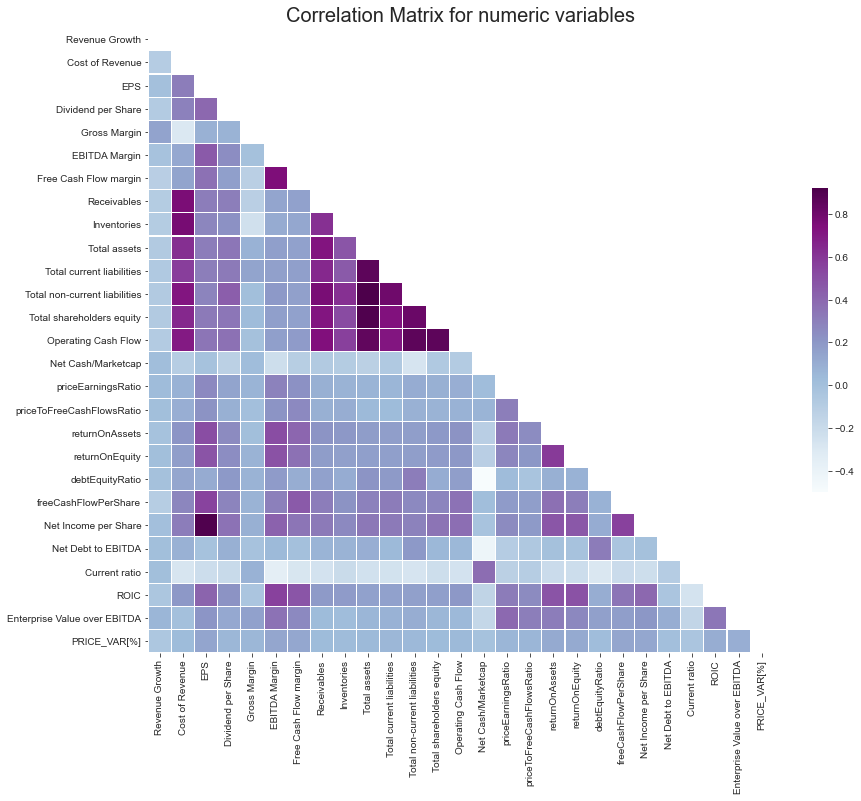

In [6]:
correlation_matrix = data.drop(['Sector',
                                'Class',
                                'year', 
                                'EBITDA Margin Company vs. Sector [%]',
                                'FCF Margin Company vs. Sector [%]',
                                'Div_vs_sector',
                                'Total current liabilities Company vs. Sector [%]',
                                'Dividend Payments Company vs. Sector',
                                'Price_var_vs_sector',
                                'EPS Company vs. Sector [%]',
                                'Price Variation Company vs. Sector'], axis=1).corr()

mask = np.zeros_like(correlation_matrix, 
                     dtype = np.bool) #drop off upper part of cor matrix.

mask[np.triu_indices_from(mask)] = True

sns.set_style(style = 'ticks') 

f, ax = plt.subplots(figsize=(14, 14)) #dibujamos el lienzo 

sns.heatmap(correlation_matrix, 
            mask = mask,
            cmap = 'BuPu', 
            square = True,
            linewidths=.1, 
            cbar_kws = {"shrink": .4}, 
            ax = ax)   #es un grafico de mapa de calor

plt.xticks(rotation = 90)
plt.title('Correlation Matrix for numeric variables', 
          size = 20)
plt.show()

In [7]:
corr = data.corr()
corr.style.background_gradient(cmap='BuGn')

,Revenue Growth,Cost of Revenue,EPS,Dividend per Share,Gross Margin,EBITDA Margin,Free Cash Flow margin,Receivables,Inventories,Total assets,Total current liabilities,Total non-current liabilities,Total shareholders equity,Operating Cash Flow,Net Cash/Marketcap,priceEarningsRatio,priceToFreeCashFlowsRatio,returnOnAssets,returnOnEquity,debtEquityRatio,freeCashFlowPerShare,Net Income per Share,Net Debt to EBITDA,Current ratio,ROIC,Enterprise Value over EBITDA,PRICE_VAR[%],Class,EBITDA Margin Company vs. Sector [%],FCF Margin Company vs. Sector [%],EPS Company vs. Sector [%],Total current liabilities Company vs. Sector [%],Dividend Payments Company vs. Sector,Div_vs_sector,Price Variation Company vs. Sector,Price_var_vs_sector,year
Revenue Growth,1.000000,-0.092250,0.000928,-0.079508,0.151164,-0.012225,-0.110104,-0.084633,-0.088281,-0.076879,-0.062335,-0.077604,-0.074663,-0.082311,0.016353,0.028975,0.011891,-0.007394,0.012745,-0.004788,-0.098975,0.006897,0.013166,0.015518,-0.045156,0.061100,-0.047549,-0.048904,-0.010210,0.002891,-0.011682,-0.055901,-0.077525,-0.113036,-0.027960,-0.032256,0.026943
Cost of Revenue,-0.092250,1.000000,0.310535,0.295397,-0.293711,0.125531,0.145013,0.765344,0.771866,0.631643,0.575372,0.718537,0.653369,0.703195,-0.096773,0.079272,0.097372,0.212212,0.175967,0.134710,0.272980,0.310255,0.083804,-0.268002,0.199483,-0.000789,0.035258,0.055070,0.008955,-0.044109,0.056368,0.675900,0.512407,0.400674,0.026203,0.040209,0.006012
EPS,0.000928,0.310535,1.000000,0.400497,0.087491,0.458549,0.365566,0.312405,0.271338,0.315509,0.309328,0.287755,0.325095,0.348801,-0.008376,0.262792,0.224232,0.515621,0.487824,0.110601,0.557480,0.909392,-0.011710,-0.212846,0.417058,0.212934,0.142789,0.153944,0.011816,-0.067361,0.178107,0.273405,0.278638,0.409681,0.109102,0.135240,0.077776
Dividend per Share,-0.079508,0.295397,0.400497,1.000000,0.073811,0.243990,0.165989,0.306490,0.230945,0.342359,0.322445,0.438723,0.339461,0.365713,-0.122385,0.147961,0.088799,0.257192,0.245063,0.195451,0.284566,0.355015,0.090144,-0.191564,0.223267,0.124635,0.059991,0.095518,0.011554,-0.052072,0.039559,0.298618,0.492832,0.723628,0.030675,0.037878,0.012633
Gross Margin,0.151164,-0.293711,0.087491,0.073811,1.000000,-0.004649,-0.112240,-0.117308,-0.236255,0.078059,0.144988,0.014813,0.030003,-0.001074,0.024575,0.067321,0.008709,0.012588,0.076078,0.074993,0.074944,0.089021,-0.015656,0.076938,-0.038173,0.159724,0.057650,0.074640,-0.005513,-0.011735,0.005516,-0.002770,0.034370,0.089715,0.039141,0.041487,0.009536
EBITDA Margin,-0.012225,0.125531,0.458549,0.243990,-0.004649,1.000000,0.751501,0.140536,0.111843,0.167264,0.165321,0.195231,0.169301,0.170432,-0.222358,0.290753,0.217969,0.514636,0.491483,0.186305,0.302047,0.423698,0.040491,-0.350140,0.563693,0.357275,0.134315,0.137959,0.032008,-0.157329,0.043089,0.132236,0.128177,0.295931,0.081777,0.128025,-0.060075
Free Cash Flow margin,-0.110104,0.145013,0.365566,0.165989,-0.112240,0.751501,1.000000,0.154921,0.126888,0.157720,0.170129,0.163736,0.155008,0.185699,-0.103658,0.229352,0.260490,0.410129,0.365128,0.099927,0.456338,0.347102,0.004334,-0.274981,0.480879,0.265423,0.128670,0.120895,0.027353,-0.154058,0.038190,0.138134,0.130523,0.241464,0.086775,0.125799,-0.003823
Receivables,-0.084633,0.765344,0.312405,0.306490,-0.117308,0.140536,0.154921,1.000000,0.623470,0.721973,0.654098,0.771257,0.719358,0.741832,-0.074299,0.088806,0.090215,0.218800,0.181067,0.155729,0.311999,0.323059,0.069866,-0.252956,0.193495,0.037210,0.035495,0.055509,0.006980,-0.038580,0.056823,0.720244,0.584630,0.419189,0.022787,0.040290,0.013753
Inventories,-0.088281,0.771866,0.271338,0.230945,-0.236255,0.111843,0.126888,0.623470,1.000000,0.480720,0.459274,0.625483,0.521607,0.569448,-0.087889,0.073840,0.101142,0.201061,0.161900,0.110095,0.222763,0.263102,0.074266,-0.199802,0.187925,0.022660,0.032324,0.042602,0.012448,-0.045187,0.053639,0.606654,0.458897,0.336773,0.023181,0.038812,0.015098
Total assets,-0.076879,0.631643,0.315509,0.342359,0.078059,0.16726

Problems occur when correlation is higher than 70% (or $\pm$ 0.7). If we check which variables have that or higher correlation value (in absolute values), we will get those are total current and non-current liabilities and total shareholders equity, which we previously knew they were correlated. 

In [8]:
def correlation(dataset, threshold):
    
    corr_columns = set()  
    
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        
        for j in range(i):
            
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                corr_columns.add(colname)
                
    return corr_columns

corr_data = correlation(data_2018_selected, 0.75)

corr_data

{'Class',
 'Free Cash Flow margin',
 'Inventories',
 'Net Income per Share',
 'Operating Cash Flow',
 'Price Variation Company vs. Sector',
 'Receivables',
 'Total current liabilities',
 'Total current liabilities Company vs. Sector [%]',
 'Total non-current liabilities',
 'Total shareholders equity'}

# Variables analysis:

## Class behaviour for each different year

If we consider the class behaviour for different years, we will be able to manage out whether it was an hopeful period or not.

C:\Users\barco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


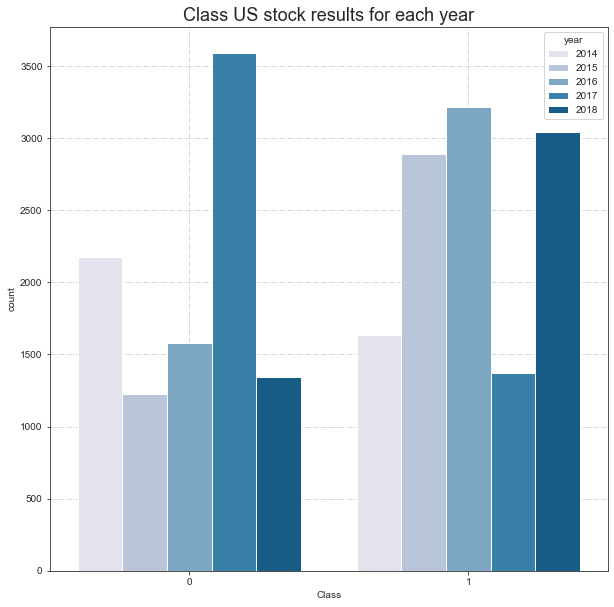

In [9]:
figure, ax0 = plt.subplots(1,1)
figure.set_size_inches(10,10)

sns.countplot(data.Class, hue = data.year, palette = "PuBu")
ax0.grid(ls = '-.')
ax0.set_title("Class US stock results for each year", size = 18);

As we see, in 2014 and 2017 there were many more companies which reflected a negative behaviour of price variation than a positive one. In contrast, 2015, 2016 and 2018 must have been great periods for the majority of US stock companies, because there were a large number of companies that had a positive price-variation compared to those which had a negative one.

##  Sectors distribution in the dataset.

If we show a countplot with the sector of each different company up in the dataset, we will figure out that the most numerous group is Financial Sector, followed by Healthcare and Technology sectors.

C:\Users\barco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


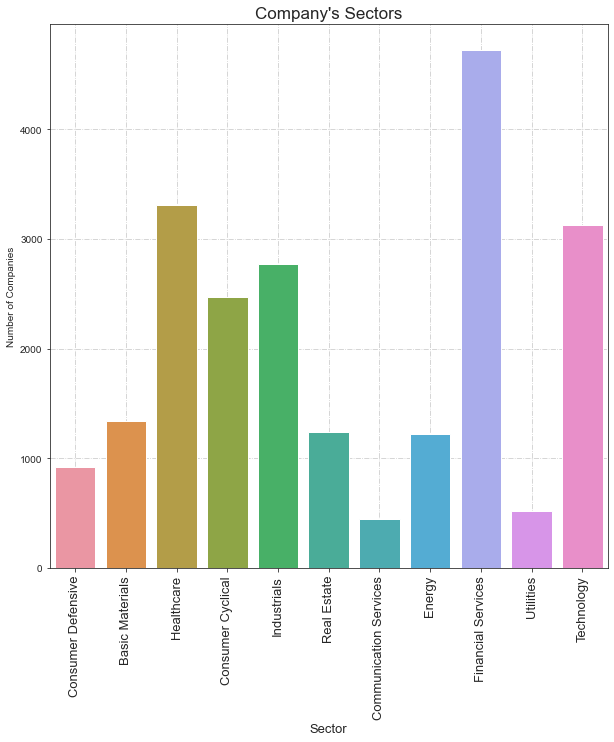

In [10]:
figure, ax0 = plt.subplots(1,1)
figure.set_size_inches(10,10)
sns.countplot(data["Sector"])
plt.xlabel("Sector", size = 13)
plt.ylabel("Number of Companies")
plt.title("Company's Sectors", size = 17)
plt.grid(ls = '-.')
plt.xticks(rotation = 90, size = 13);

## Total amount of dividend per share given out for each different sector in every year

In [11]:
total_div_per_year_sector = pd.DataFrame(data.groupby(['Sector', 'year'])['Dividend per Share'].sum())

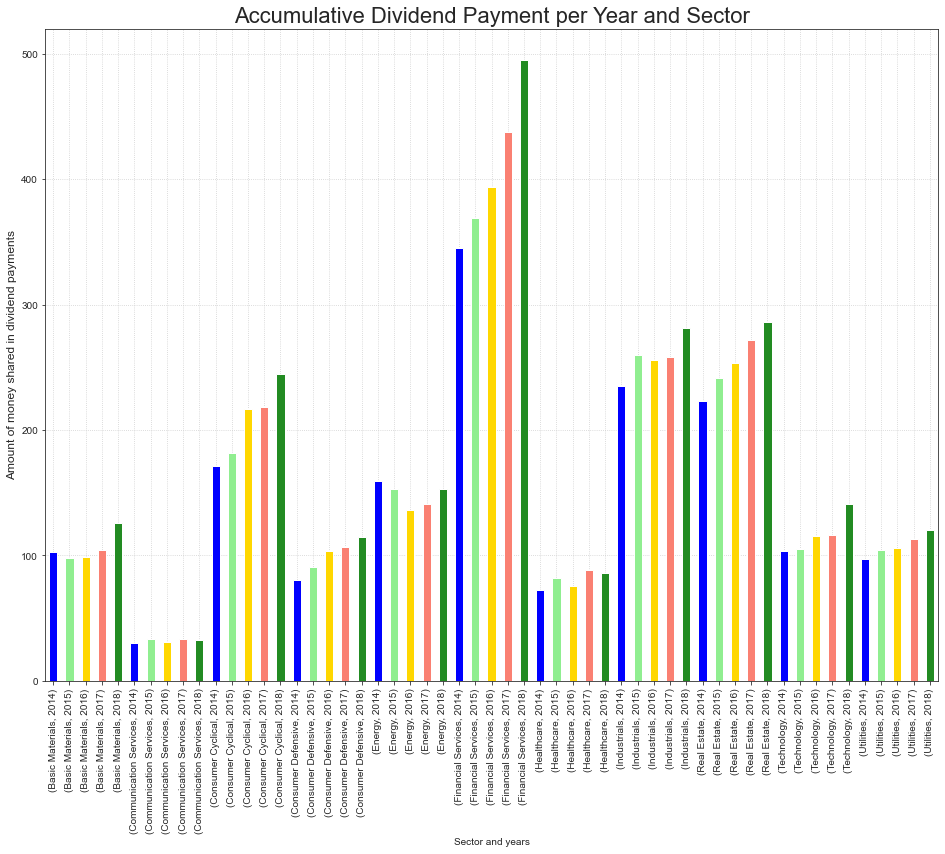

In [12]:
plt.figure(figsize = (16, 12))
total_div_per_year_sector['Dividend per Share'].plot(kind = 'bar', 
                                                     color = ('blue', 'lightgreen', 'gold', 'salmon', 'forestgreen'))
plt.title('Accumulative Dividend Payment per Year and Sector', size = 22)
plt.ylabel('Amount of money shared in dividend payments',size = 12)
plt.xlabel('Sector and years')
plt.grid(ls = ':');

We check that in most of the sectors the dividend per share has increased for each consecutive year. 

Moreover, the sectors that give out the highest amount of money on dividends per share are:

+ Financial Services

+ Industrials

+ Real Estate

On the other side, those which pais the less amount of money on dividends are:

+ Communication Services

+ Healthcare

So, if we are interested in liquidity we should invest in Financial Services' companies.


It is also curious that Dividend per Share values increase every year for every sector except Energy sector case, which has it max value in 2014.

## Dividend payments compared to its sector:

__This will be one of our target variables for the models__.

Let's check how well do this variable we created by applying transformations behave:

C:\Users\barco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


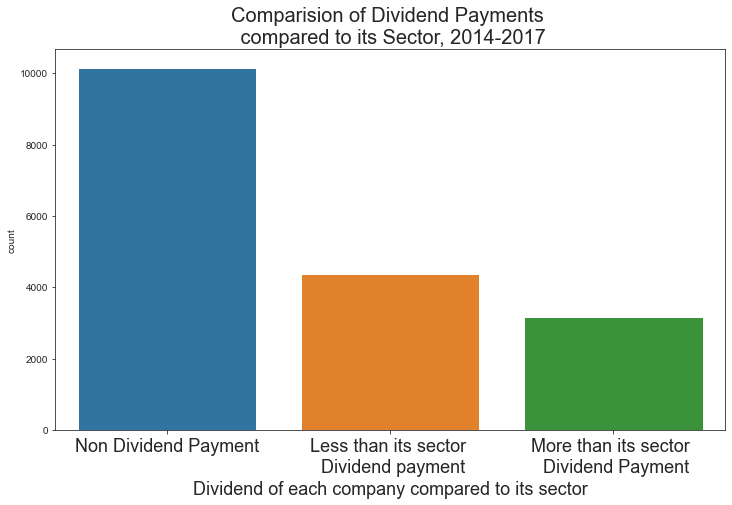

In [262]:
plt.figure(figsize = (12, 7))
sns.countplot(data[data.year != 2018].Div_vs_sector)
plt.title('Comparision of Dividend Payments \n compared to its Sector, 2014-2017', size = 20)
plt.xlabel('Dividend of each company compared to its sector', size = 18)
plt.xticks(np.arange(3),
           (['Non Dividend Payment', 'Less than its sector \n Dividend payment', 
             'More than its sector \n Dividend Payment']), 
           rotation = 0, 
           size = 18);

We see that data is a little bit unbalanced between non-dividend payment and the rest of them, something that could lead us to have problem when running our models.

In particular, for the 2018 data (test sample) it behaves in the same way. It is really important due to not to make some data sampling misunderstanding.

C:\Users\barco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


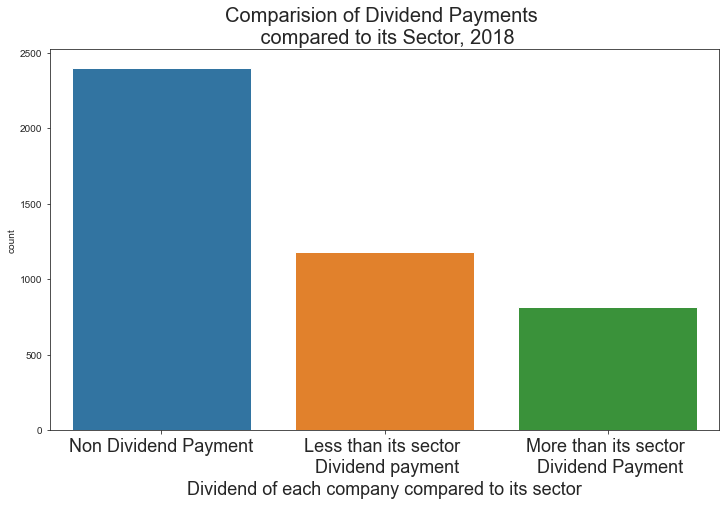

In [264]:
plt.figure(figsize = (12, 7))
sns.countplot(data[data.year == 2018].Div_vs_sector)
plt.title('Comparision of Dividend Payments \n compared to its Sector, 2018', size = 20)
plt.xlabel('Dividend of each company compared to its sector', size = 18)
plt.xticks(np.arange(3),
           (['Non Dividend Payment', 'Less than its sector \n Dividend payment', 
             'More than its sector \n Dividend Payment']), 
           rotation = 0, 
           size = 18);

## Some variables distributions:


In the previous year-per-year analysis notebooks, we realized that there were quite a big number of outliers in our datasets. Once they have been dropped away, we consider it is usefull and important to know about some cases of data distribution for different variables.

In particular, for the future Gaussian Naive-Bayes model that we will develope, it is important to know if the variables follow a _kind-of-normal_ distribution, because the more normalized distribution they have, the better N-B results are.

For example, for: `EPS`, `Price Varation`, `Cost of Revenue`, `Free Cash Flow Margin`, `Price Variation Company vs. Sector`, `Dividend Payments Company vs. Sector`, `ROE` and `ROA`, the distributions are:

C:\Users\barco\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\barco\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\barco\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

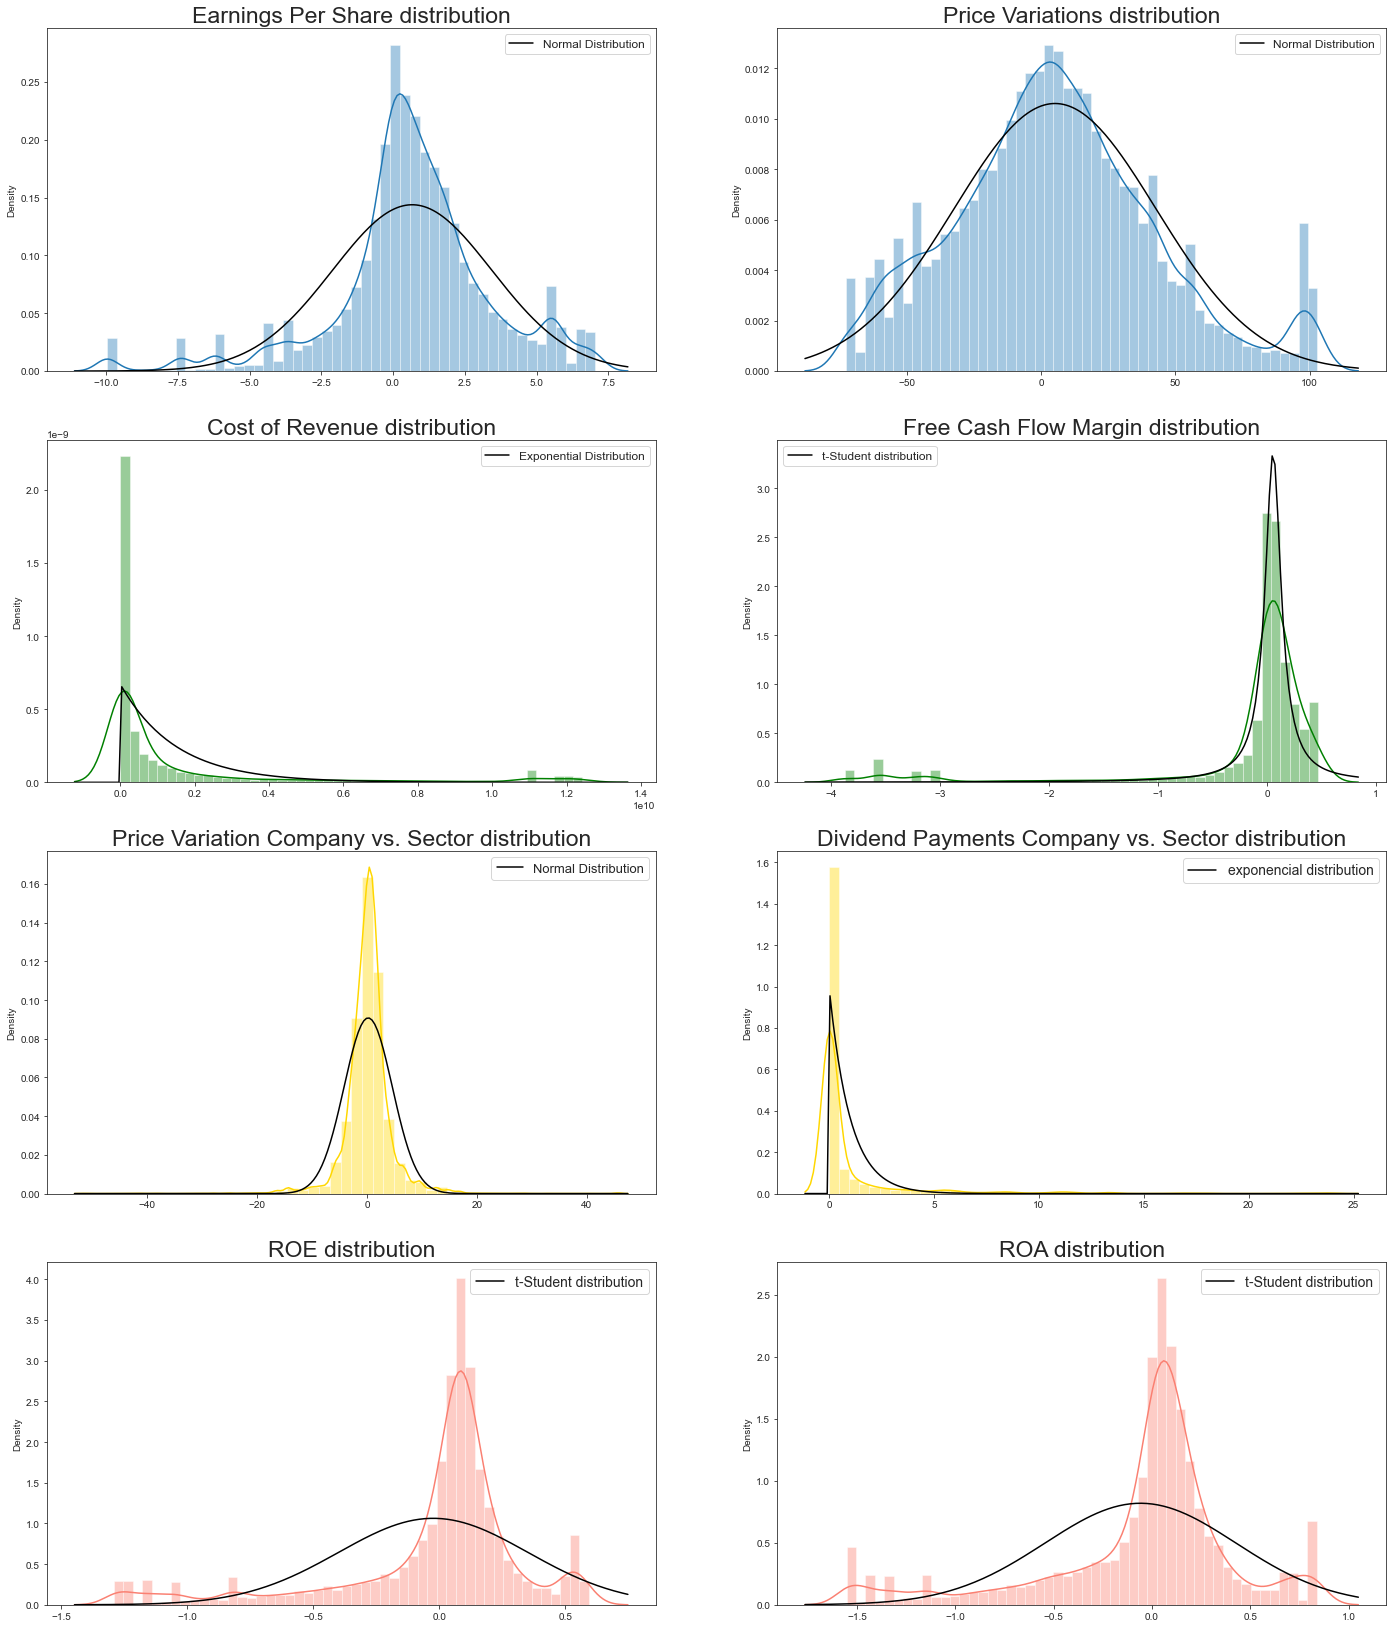

In [79]:
figure, ax0 = plt.subplots(4,2)
figure.set_size_inches(24,29)

sns.distplot(ax = ax0[0,0], 
             x = data.EPS, 
             fit = stats.norm, 
             fit_kws={"color": "k", 
                      "lw": 1.5, 
                      "label": "Normal Distribution"})
ax0[0,0].legend(fontsize = 12)
ax0[0,0].set_title('Earnings Per Share distribution', size = 23);

sns.distplot(ax = ax0[0,1], 
             x = data['PRICE_VAR[%]'], 
             fit = stats.norm,
             fit_kws={"color": "k", 
                      "lw": 1.5, 
                      "label": "Normal Distribution"})
ax0[0,1].legend(fontsize = 12)
ax0[0,1].set_title('Price Variations distribution', size = 23);

sns.distplot(ax = ax0[1,0], 
             x = data['Cost of Revenue'], 
             color = 'Green',
             fit = stats.expon,
             fit_kws={"color": "k", 
                      "lw": 1.5, 
                      "label": "Exponential Distribution"})
ax0[1,0].legend(fontsize = 12)
ax0[1,0].set_title('Cost of Revenue distribution', size = 23);

sns.distplot(ax = ax0[1,1], 
             x = data['Free Cash Flow margin'],
             color = 'Green',
             fit = stats.t,
             fit_kws={"color": "k", 
                      "lw": 1.5, 
                      "label": "t-Student distribution"})
ax0[1,1].legend(fontsize = 12)
ax0[1,1].set_title('Free Cash Flow Margin distribution', size = 23);

sns.distplot(ax = ax0[2,0], 
             x = data['Price Variation Company vs. Sector'], 
             color = 'Gold',
             fit = stats.norm,
             fit_kws={"color": "k", 
                      "lw": 1.5, 
                      "label": "Normal Distribution"})
ax0[2,0].legend(fontsize = 13)
ax0[2,0].set_title('Price Variation Company vs. Sector distribution', size = 23);

sns.distplot(ax = ax0[2,1], 
             x = data['Dividend Payments Company vs. Sector'], 
             color = 'Gold',
             fit = stats.expon,
             fit_kws={"color": "k", 
                      "lw": 1.5, 
                      "label": "exponencial distribution"})
ax0[2,1].legend(fontsize = 14)
ax0[2,1].set_title('Dividend Payments Company vs. Sector distribution', size = 23);

sns.distplot(ax = ax0[3,0], 
             x = data['returnOnEquity'], 
             color = 'salmon',
             fit = stats.norm,
             fit_kws={"color": "k", 
                      "lw": 1.5, 
                      "label": "t-Student distribution"})
ax0[3,0].legend(fontsize = 14)
ax0[3,0].set_title('ROE distribution', size = 23);

sns.distplot(ax = ax0[3,1], 
             x = data['returnOnAssets'], 
             color = 'Salmon',
             fit = stats.norm,
             fit_kws={"color": "k", 
                      "lw": 1.5, 
                      "label": "t-Student distribution"})
ax0[3,1].legend(fontsize = 14)
ax0[3,1].set_title('ROA distribution', size = 23);

We see that a half of this sample of variables we have decided to study does not follow normalized distributions, so we do not expect to get perfect results with the Gaussian Naive-Bayes model. Only Price Variations seems to be normal-distributed.

## Price variation behaviour

Once we have cleaned up outliers in the previous notebooks, we want to see how this variable really behave:

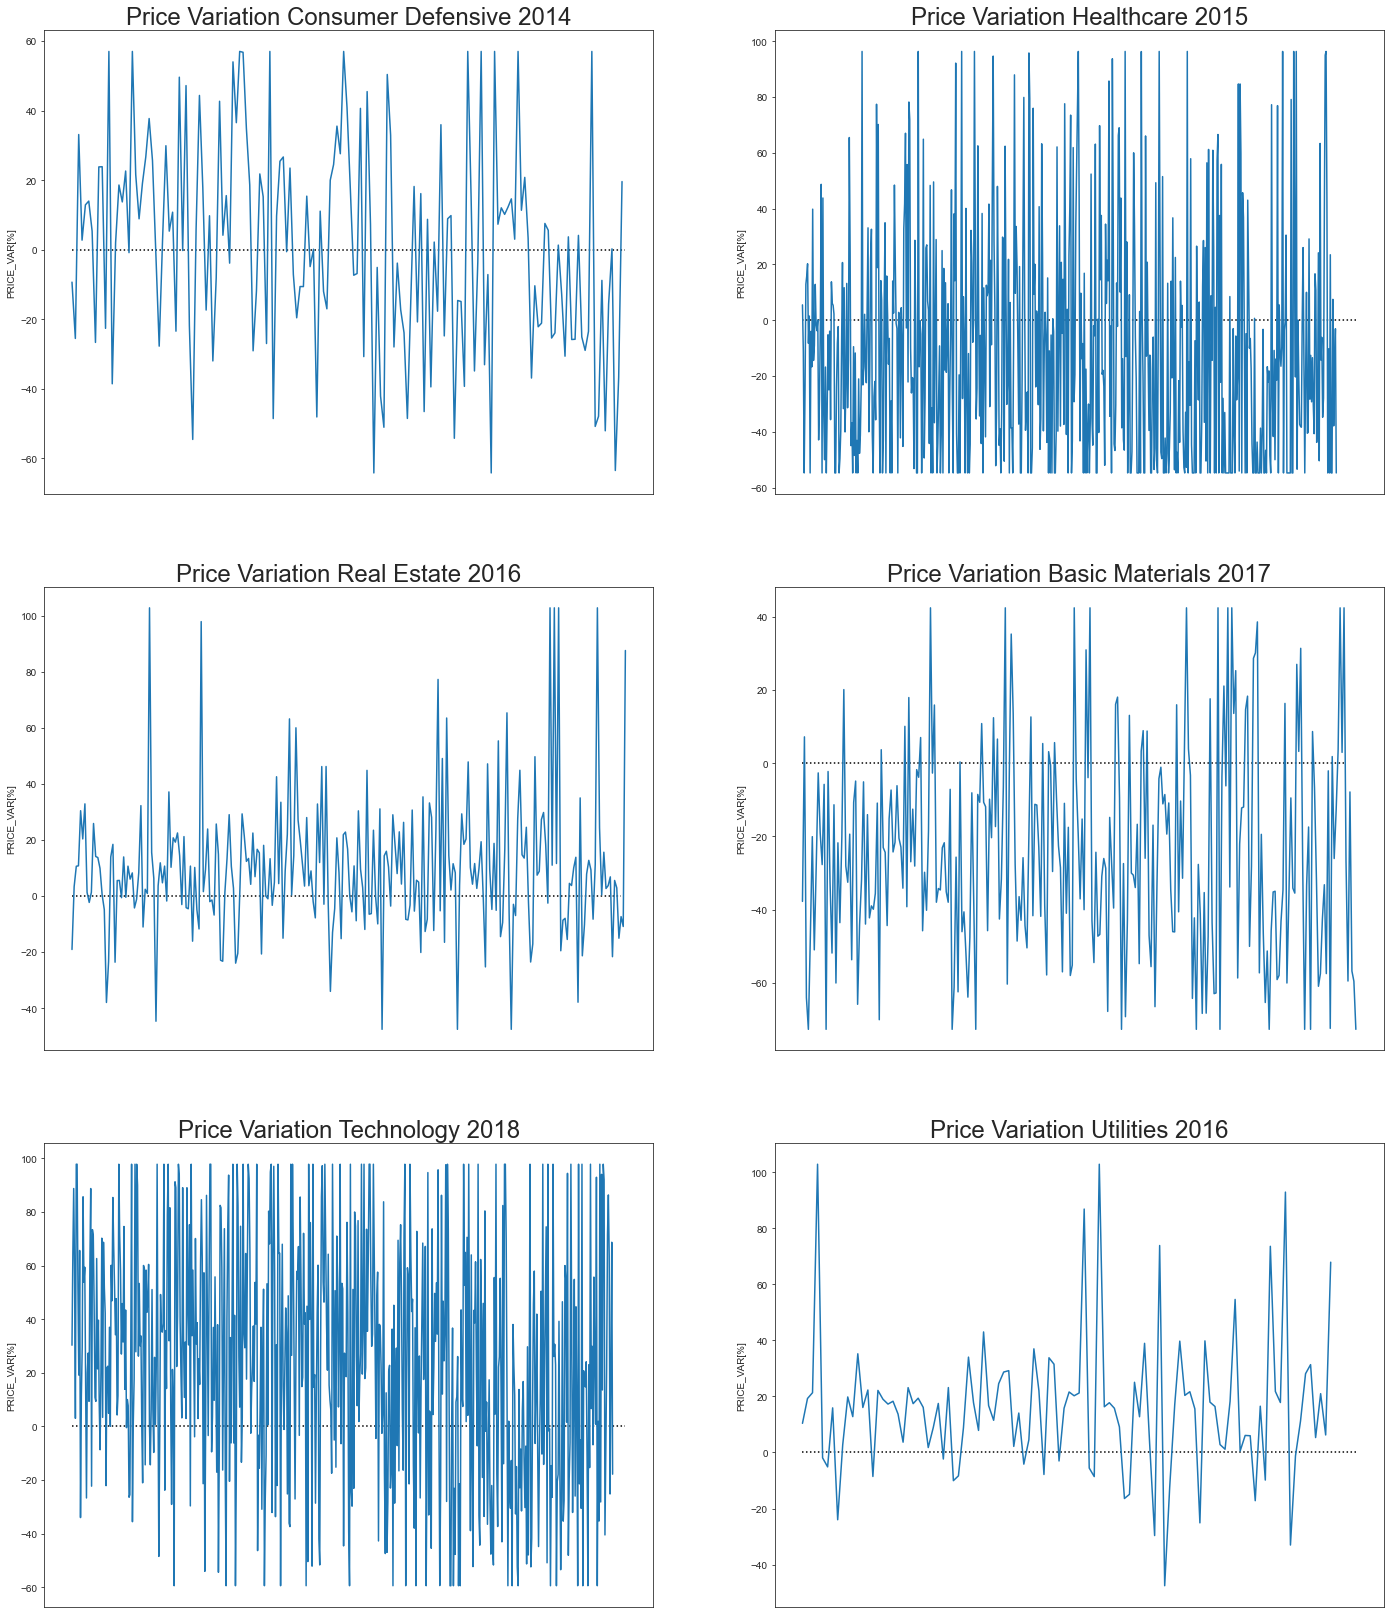

In [29]:
figure, ax0 = plt.subplots(3,2)
figure.set_size_inches(24,29)

sns.lineplot(ax = ax0[0,0], 
             data = data[(data['Sector'] == 'Consumer Defensive') & (data['year'] == 2014)]['PRICE_VAR[%]'])
ax0[0,0].hlines(y = 0, xmin = 0, xmax = 165, ls = ':', color = 'black')
ax0[0,0].set_title('Price Variation Consumer Defensive 2014', 
                   size = 24)
ax0[0,0].tick_params(axis='x',
                     which = 'both',
                     bottom = False, 
                     top = False, 
                     labelbottom = False);

sns.lineplot(ax = ax0[0,1], 
             data = data[(data['Sector'] == 'Healthcare') & (data['year'] == 2015)]['PRICE_VAR[%]'])
ax0[0,1].hlines(y = 0, xmin = 0, xmax = 650, ls = ':', color = 'Black')
ax0[0,1].set_title('Price Variation Healthcare 2015', 
                   size = 24)
ax0[0,1].tick_params(axis = 'x',
                     which = 'both',
                     bottom = False, 
                     top = False, 
                     labelbottom = False);

sns.lineplot(ax = ax0[1,0], 
             data = data[(data['Sector'] == 'Real Estate') & (data['year'] == 2016)]['PRICE_VAR[%]'])
ax0[1,0].hlines(y = 0, xmin = 0, xmax = 255, ls = ':', color = 'black')
ax0[1,0].set_title('Price Variation Real Estate 2016', 
                   size = 24)
ax0[1,0].tick_params(axis = 'x',
                     which = 'both',
                     bottom = False, 
                     top = False, 
                     labelbottom = False);

sns.lineplot(ax = ax0[1,1], 
             data = data[(data['Sector'] == 'Basic Materials') & (data['year'] == 2017)]['PRICE_VAR[%]'])
ax0[1,1].hlines(y = 0, xmin = 0, xmax = 275, ls = ':', color = 'black')
ax0[1,1].set_title('Price Variation Basic Materials 2017', 
                   size = 24)
ax0[1,1].tick_params(axis = 'x',
                     which = 'both',
                     bottom = False, 
                     top = False, 
                     labelbottom = False);

sns.lineplot(ax = ax0[2,0],
             data = data[(data['Sector'] == 'Technology') & (data['year'] == 2018)]['PRICE_VAR[%]'])
ax0[2,0].hlines(y = 0, xmin = 0, xmax = 650, ls = ':', color = 'black')
ax0[2,0].set_title('Price Variation Technology 2018', 
                   size = 24)
ax0[2,0].tick_params(axis = 'x',
                     which = 'both',
                     bottom = False, 
                     top = False, 
                     labelbottom = False);

sns.lineplot(ax = ax0[2,1], 
             data = data[(data['Sector'] == 'Utilities') & (data['year'] == 2016)]['PRICE_VAR[%]'])
ax0[2,1].hlines(y = 0, xmin = 0, xmax = 110, ls = ':', color = 'black')
ax0[2,1].set_title('Price Variation Utilities 2016', 
                   size = 24)
ax0[2,1].tick_params(axis = 'x',
                     which = 'both',
                     bottom = False, 
                     top = False, 
                     labelbottom = False);

Here it is clear that Healthcare and Technology sectors have a really variable price variation.

We also see that Real Estate and Utilities 2016 sectors seems to have, in most of its companies, more positive price variations than negative results. 

On the other hand, Basic Materials in 2017 seems to behave the other way around; it has more negative values than positive ones. 

### Price Variation Compared to its sector:

Once we have made the transformation and division of this variable, it is important to know how does it behave visually. 

For our future data-train sample (years 2014 to 2017), the variable seems to behave like:

C:\Users\barco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


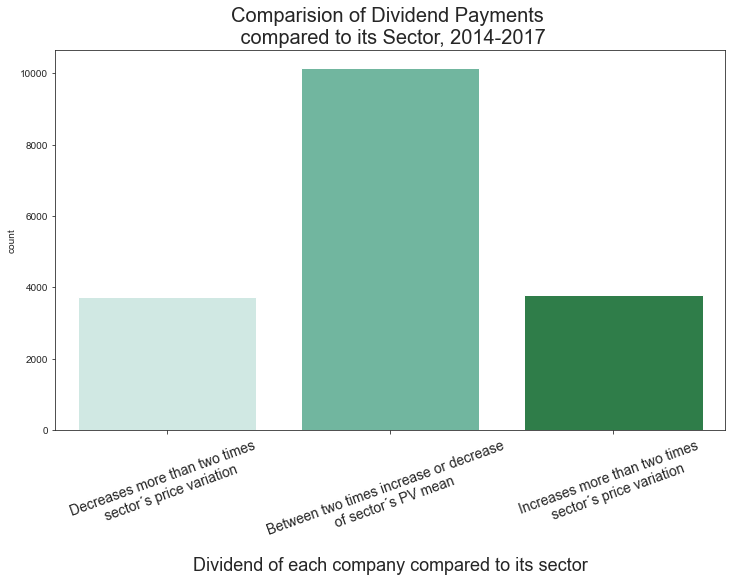

In [23]:
plt.figure(figsize = (12, 7))
sns.countplot(data[data.year != 2018].Price_var_vs_sector, 
              palette = 'BuGn')
plt.title('Comparision of Dividend Payments \n compared to its Sector, 2014-2017', size = 20)
plt.xlabel('Dividend of each company compared to its sector', size = 18)
plt.xticks(np.arange(3),
           (['Decreases more than two times \n sector´s price variation', 
             'Between two times increase or decrease \n of sector´s PV mean', 
             'Increases more than two times \n sector´s price variation']), 
           rotation = 20, 
           size = 14);

On the other side, for our test-data sample (2018 data), it behaves slightly different, because 0 and 2 classes are not as balanced as they are for 2014 to 2017. 

That could lead us to get into some classification troubles, like a bit of overfitting on the future models.

C:\Users\barco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


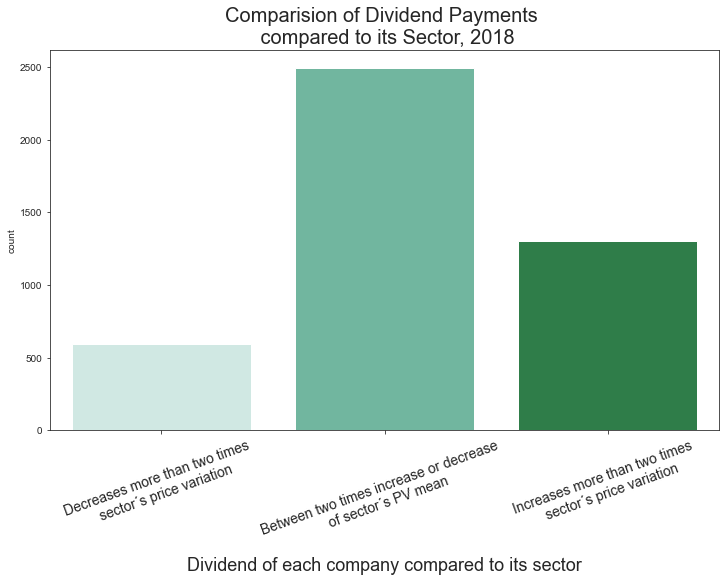

In [24]:
plt.figure(figsize = (12, 7))
sns.countplot(data[data.year == 2018].Price_var_vs_sector, 
              palette = 'BuGn')
plt.title('Comparision of Dividend Payments \n compared to its Sector, 2018', size = 20)
plt.xlabel('Dividend of each company compared to its sector', size = 18)
plt.xticks(np.arange(3),
           (['Decreases more than two times \n sector´s price variation', 
             'Between two times increase or decrease \n of sector´s PV mean', 
             'Increases more than two times \n sector´s price variation']), 
           rotation = 20, 
           size = 14);

## Other interesting Ratios to study:

There are many variables that we have not shown in detail because they are not so important, in our opinion, as the ones we have shown.

For example, these are:

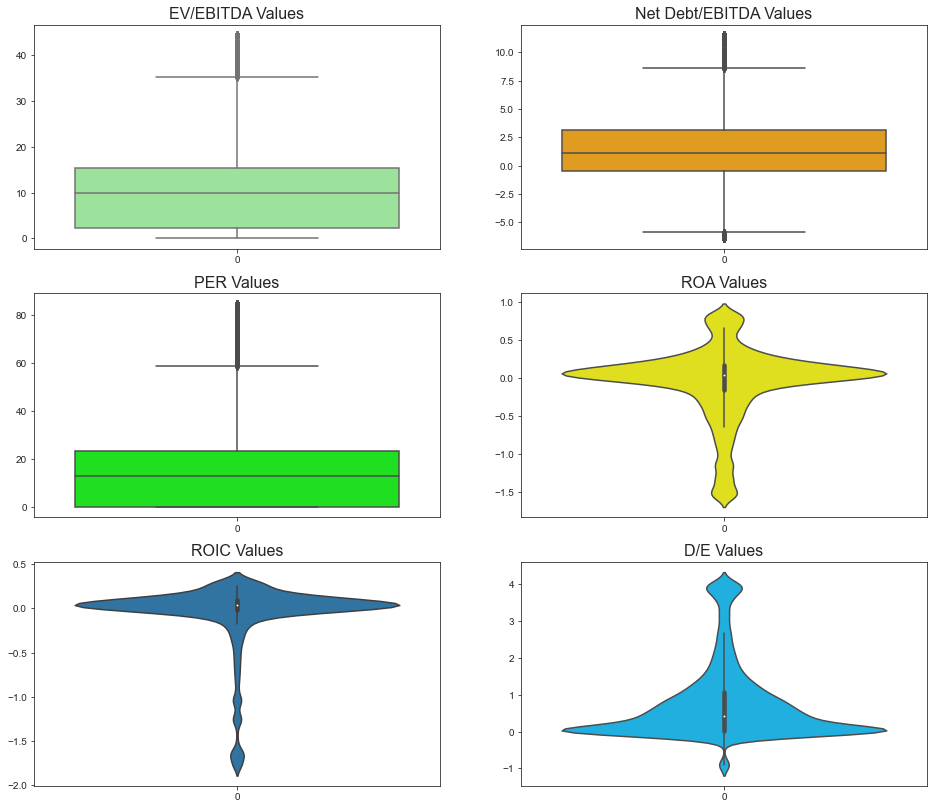

In [86]:
figure, ax1 = plt.subplots(3,2)
figure.set_size_inches(16,14)

sns.boxplot(ax = ax1[0,0],
            data = data['Enterprise Value over EBITDA'],
            color = 'lightgreen')
ax1[0,0].set_title('EV/EBITDA Values', size = 16);

sns.boxplot(ax = ax1[0,1], 
            data = data['Net Debt to EBITDA'],
            color = 'Orange')
ax1[0,1].set_title('Net Debt/EBITDA Values', size = 16);

sns.violinplot(ax = ax1[2,0], 
               data = data.ROIC)
ax1[2,0].set_title('ROIC Values', size = 16);

sns.violinplot(ax = ax1[1,1],
               data = data.returnOnAssets,
               color = 'Yellow')
ax1[1,1].set_title('ROA Values', size = 16);

sns.boxplot(ax = ax1[1,0],
               data = data.priceEarningsRatio,
               color = 'Lime')
ax1[1,0].set_title('PER Values', size = 16);

sns.violinplot(ax = ax1[2,1],
               data = data.debtEquityRatio,
               color = 'Deepskyblue')
ax1[2,1].set_title('D/E Values', size = 16);


We check that:

+ ROIC: its most common value is 0. It has quite a few values higher than 0, but many more appears to be negative values.

+ ROA: as well as ROIC, ROA behaviour is: the most common repeated value is 0, and it has many more negative than positive values.

+ Net Debt/EBITDA: its median is about 1, and has more variation to higher than lower values.

+ EV/EBITDA: has a median of 10, and it has many companies over 35-value. For example, Amazon is one of those companies considered as outliers for this variable.

+ PER values are, generally, quite high; median is on 15 and few companies have PER over 60 (which compounds such a big value). PER is always positive. This is because negative-PER-values, depending the person or the company, are considered as negative (with the consequences it may have) or they are zero-imputed; this is, some people consider that a negative PER should be treated as a 0 because negatives values have difficult business interpretacion.

+ Debt to Equity Ratio (D/E Ratio) is distributed similarly to Net Debt/EBITDA; its median is lower than 1, and there are also quite a few companies with over-3 D/E values. It is strange to find a company with negative D/E values.

## Some big companies cases:

We cannot show the behaviour of every variable for every company in the dataset, because there are over 4000 companies, what would be tough to study and to implement it by coding. Due to that, we will show only a few of them. In particular, we will show Apple's, Microsoft's and Amazon's behaviour for each year:

+ __APPLE__:

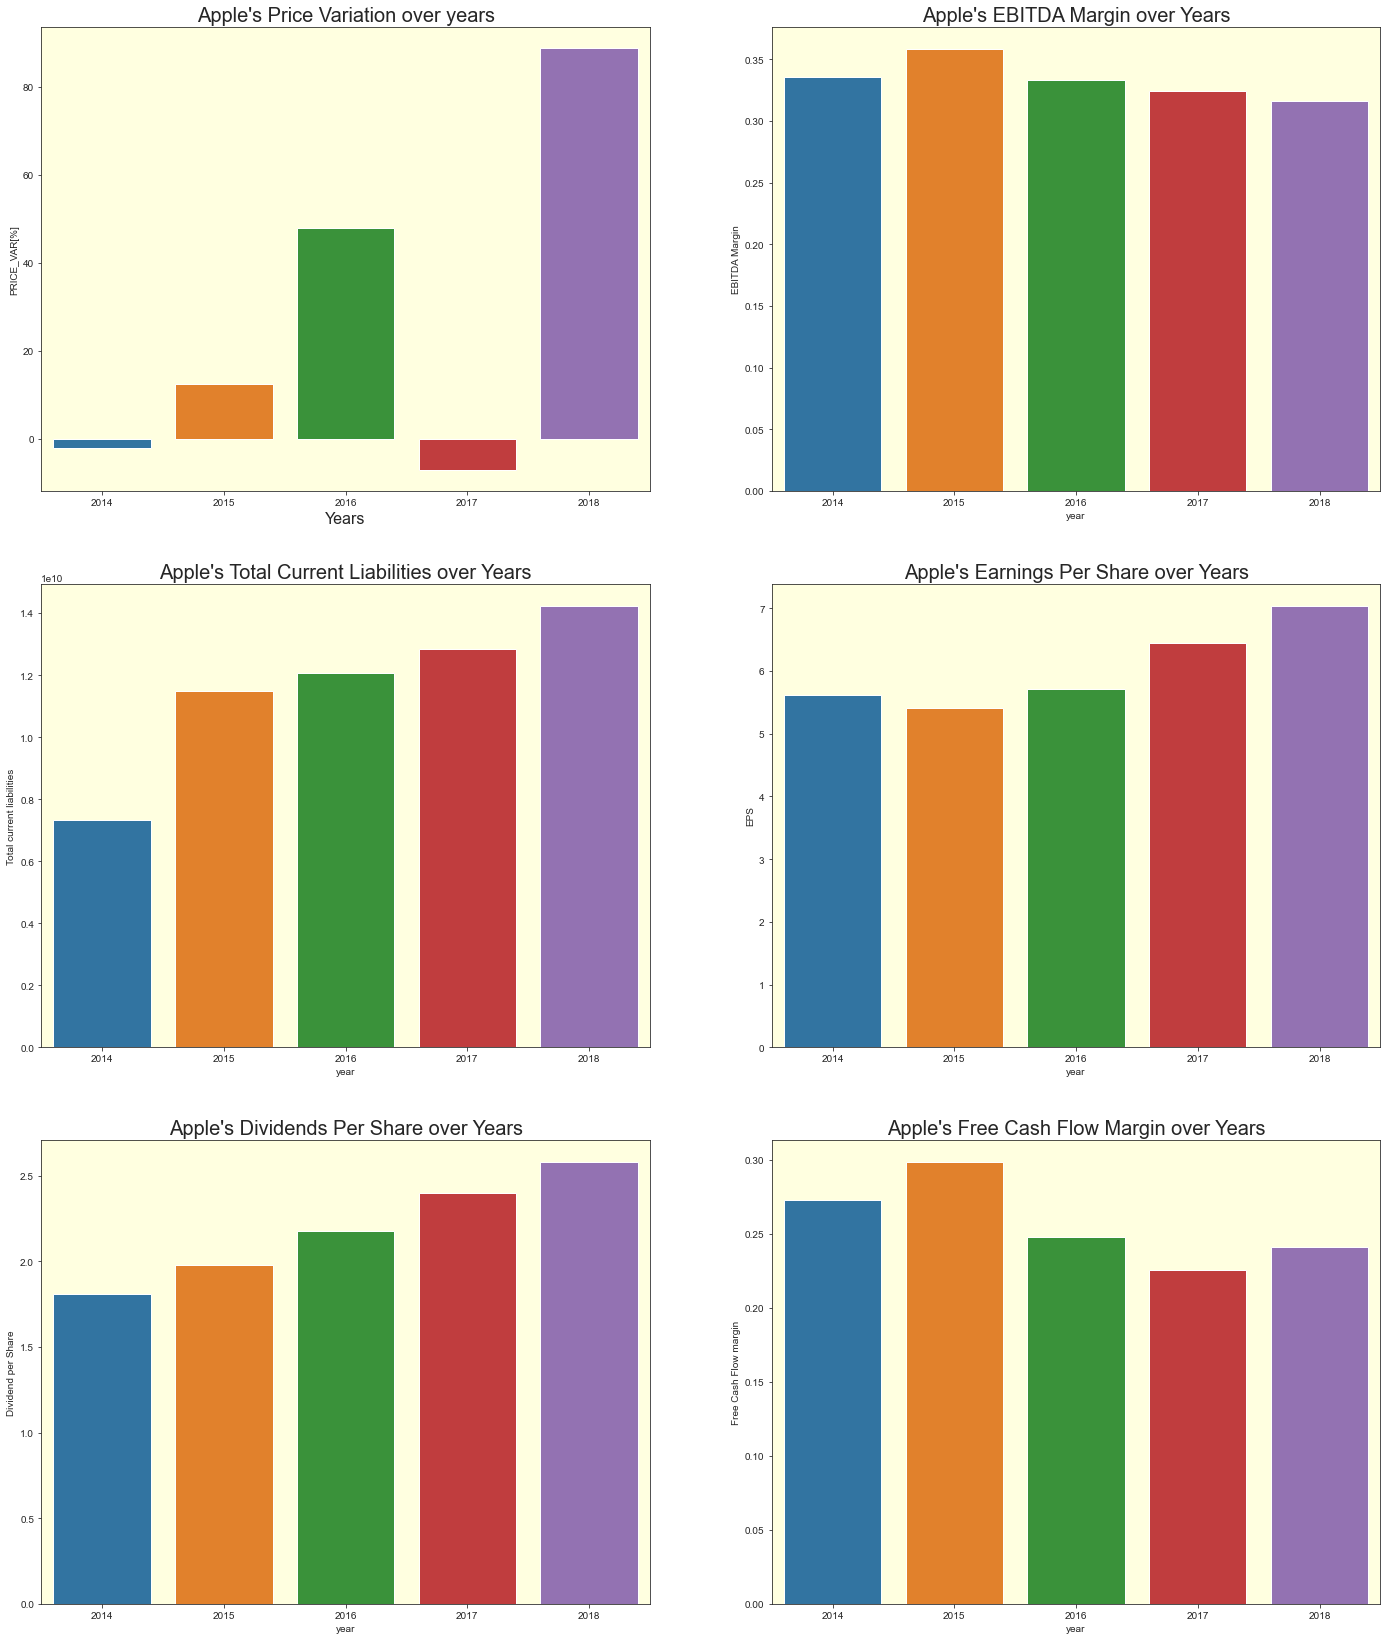

In [231]:
apple = data[data.index == 'AAPL']

figure, ax1 = plt.subplots(3,2)
figure.set_size_inches(24,29)

sns.barplot(ax = ax1[0,0], 
            x = apple.year,
            y = apple["PRICE_VAR[%]"])
ax1[0,0].set_title("Apple's Price Variation over years", size = 20)
ax1[0,0].set_xlabel('Years', size = 16)
ax1[0,0].patch.set_facecolor('lightyellow')
ax0[0,0].tick_params(axis='x',
                     which = 'both',
                     size = 19,
                     bottom = False, 
                     top = False, 
                     labelbottom = True,
                     labelsize = 15);

sns.barplot(ax = ax1[0,1], 
            x = apple.year,
            y = apple["EBITDA Margin"])
ax1[0,1].set_title("Apple's EBITDA Margin over Years", size = 20)
ax1[0,1].patch.set_facecolor('lightyellow');

sns.barplot(ax = ax1[1,0], 
            x = apple.year,
            y = apple["Total current liabilities"])
ax1[1,0].set_title("Apple's Total Current Liabilities over Years", size = 20)
ax1[1,0].patch.set_facecolor('lightyellow');

sns.barplot(ax = ax1[1,1],
            x = apple.year, 
            y = apple["EPS"])
ax1[1,1].set_title("Apple's Earnings Per Share over Years", size = 20)
ax1[1,1].patch.set_facecolor('lightyellow');

sns.barplot(ax = ax1[2,0], 
            x = apple.year,
            y = apple["Dividend per Share"])
ax1[2,0].set_title("Apple's Dividends Per Share over Years", size = 20)
ax1[2,0].patch.set_facecolor('lightyellow');

sns.barplot(ax = ax1[2,1], 
            x = apple.year, 
            y = apple["Free Cash Flow margin"])
ax1[2,1].set_title("Apple's Free Cash Flow Margin over Years", size = 20)
ax1[2,1].patch.set_facecolor('lightyellow');

We check that Apple's Price Variation increased nearly an 80% for 2019 financial year (remember 2018 data includes Price Variation of the next year, 2019). This year was announced the launching of iPhone 11 and iPhone 11 Pro, as well as iPad series 5, things that may have affected the stock prices of this company.

It is also amazing the behaviour of Apple's EPS over years; it has increased for 3 consecutive periods and the last value we get is an EPS of 7, and 2.5 Dividend per Share payments! This shows why Apple is such a good company to invest money in.

+ ### Microsoft:

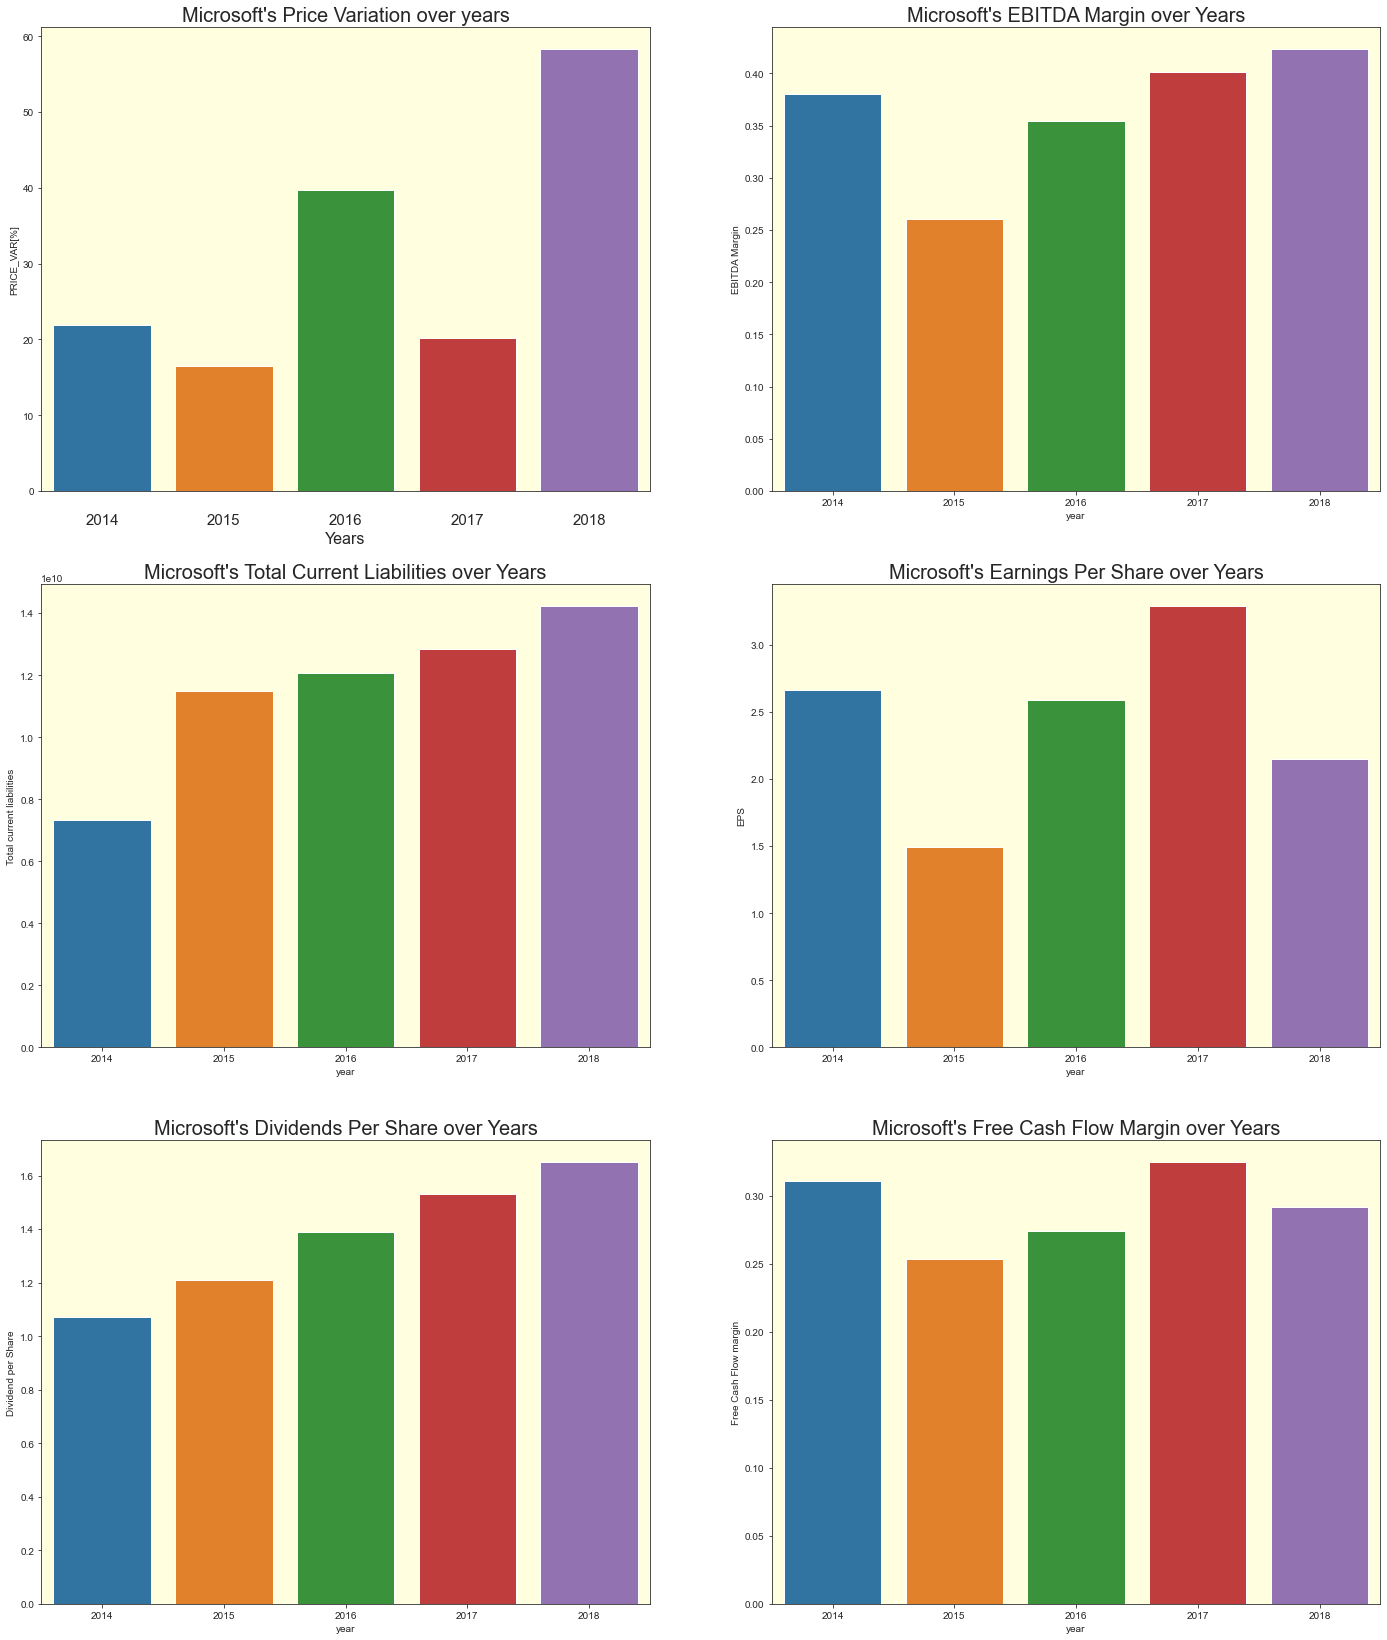

In [15]:
microsoft = data[data.index == 'MSFT']

figure, ax1 = plt.subplots(3,2)
figure.set_size_inches(24,29)

sns.barplot(ax = ax1[0,0], 
            x = microsoft.year,
            y = microsoft["PRICE_VAR[%]"])
ax1[0,0].set_title("Microsoft's Price Variation over years", size = 20)
ax1[0,0].set_xlabel('Years', size = 16)
ax1[0,0].patch.set_facecolor('lightyellow')
ax1[0,0].tick_params(axis='x',
                     which = 'both',
                     size = 19,
                     bottom = False, 
                     top = False, 
                     labelbottom = True,
                     labelsize = 15);

sns.barplot(ax = ax1[0,1], 
            x = microsoft.year,
            y = microsoft["EBITDA Margin"])
ax1[0,1].set_title("Microsoft's EBITDA Margin over Years", size = 20)
ax1[0,1].patch.set_facecolor('lightyellow');

sns.barplot(ax = ax1[1,0], 
            x = microsoft.year,
            y = microsoft["Total current liabilities"])
ax1[1,0].set_title("Microsoft's Total Current Liabilities over Years", size = 20)
ax1[1,0].patch.set_facecolor('lightyellow');

sns.barplot(ax = ax1[1,1],
            x = microsoft.year, 
            y = microsoft["EPS"])
ax1[1,1].set_title("Microsoft's Earnings Per Share over Years", size = 20)
ax1[1,1].patch.set_facecolor('lightyellow');

sns.barplot(ax = ax1[2,0], 
            x = microsoft.year,
            y = microsoft["Dividend per Share"])
ax1[2,0].set_title("Microsoft's Dividends Per Share over Years", size = 20)
ax1[2,0].patch.set_facecolor('lightyellow');

sns.barplot(ax = ax1[2,1], 
            x = microsoft.year, 
            y = microsoft["Free Cash Flow margin"])
ax1[2,1].set_title("Microsoft's Free Cash Flow Margin over Years", size = 20)
ax1[2,1].patch.set_facecolor('lightyellow');

The case of Microsoft is also really interesting. It has increased its price a 60%, and its dividends per share are getting better and better over years. But, on the other hand, its EPS is more irregular and it is not as high as the Apple's one.

In our personal opinion, Apple is a better investing choice than Microsoft, although both of them will get back with pretty good results.

+ ### Amazon:

We cannot conclude EDA Analysis without studying Amazon's case. 

It does not pay out dividends, so we will include ROE instead:

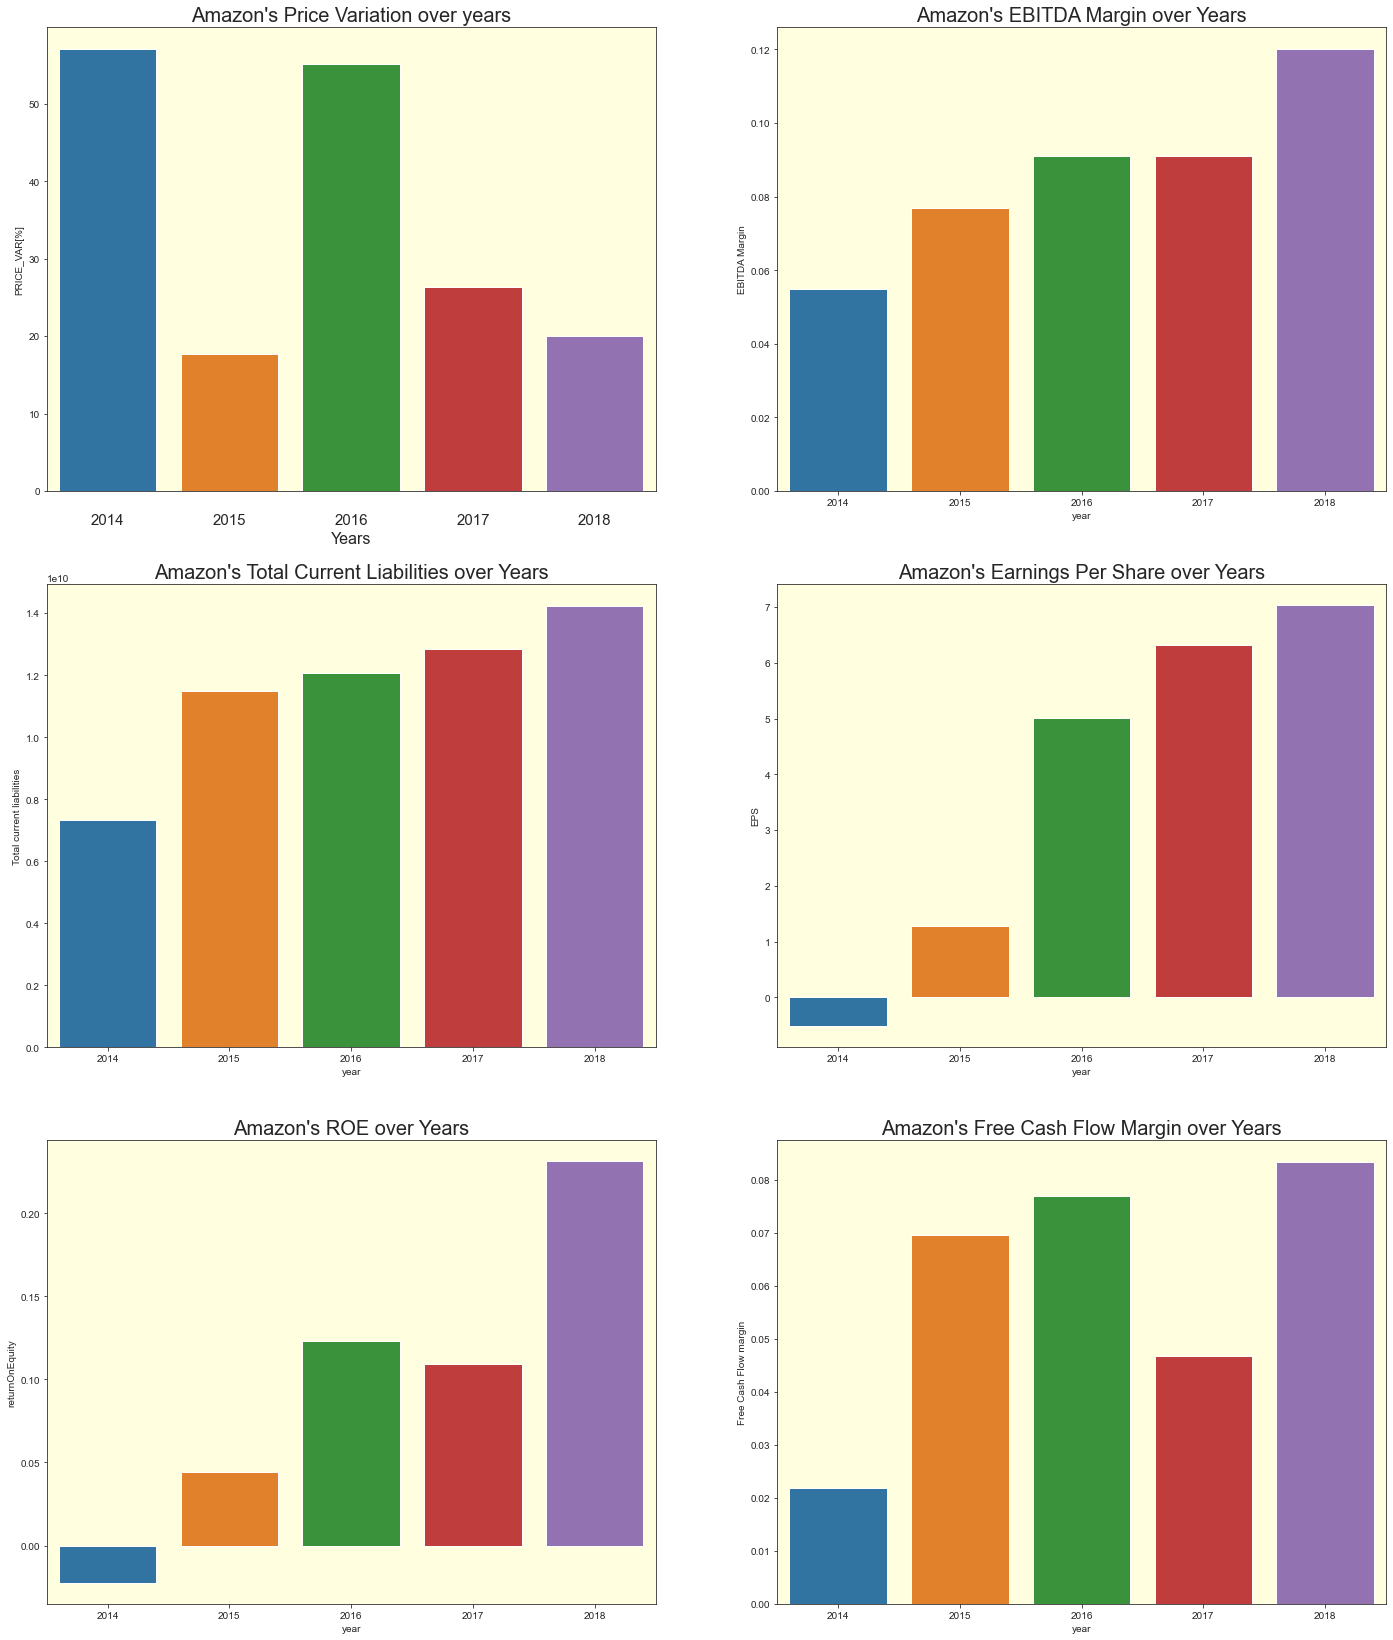

In [21]:
amazon = data[data.index == 'AMZN']

figure, ax1 = plt.subplots(3,2)
figure.set_size_inches(24,29)

sns.barplot(ax = ax1[0,0], 
            x = amazon.year,
            y = amazon["PRICE_VAR[%]"])
ax1[0,0].set_title("Amazon's Price Variation over years", size = 20)
ax1[0,0].set_xlabel('Years', size = 16)
ax1[0,0].patch.set_facecolor('lightyellow')
ax1[0,0].tick_params(axis='x',
                     which = 'both',
                     size = 19,
                     bottom = False, 
                     top = False, 
                     labelbottom = True,
                     labelsize = 15);

sns.barplot(ax = ax1[0,1], 
            x = amazon.year,
            y = amazon["EBITDA Margin"])
ax1[0,1].set_title("Amazon's EBITDA Margin over Years", size = 20)
ax1[0,1].patch.set_facecolor('lightyellow');

sns.barplot(ax = ax1[1,0], 
            x = amazon.year,
            y = amazon["Total current liabilities"])
ax1[1,0].set_title("Amazon's Total Current Liabilities over Years", size = 20)
ax1[1,0].patch.set_facecolor('lightyellow');

sns.barplot(ax = ax1[1,1],
            x = amazon.year, 
            y = amazon["EPS"])
ax1[1,1].set_title("Amazon's Earnings Per Share over Years", size = 20)
ax1[1,1].patch.set_facecolor('lightyellow');

sns.barplot(ax = ax1[2,0], 
            x = amazon.year,
            y = amazon["returnOnEquity"])
ax1[2,0].set_title("Amazon's ROE over Years", size = 20)
ax1[2,0].patch.set_facecolor('lightyellow');

sns.barplot(ax = ax1[2,1], 
            x = amazon.year, 
            y = amazon["Free Cash Flow margin"])
ax1[2,1].set_title("Amazon's Free Cash Flow Margin over Years", size = 20)
ax1[2,1].patch.set_facecolor('lightyellow');

Although Price Variation do not show it out clearly, Amazon has increased its value exponentially over these latest years. Look at EPS graphic: from almost negative values in 2014, it has overcome to a 7-value EPS! 

Price Variation highest point is on 2014, although its exercise ended up with losses. 

You can also see it in ROE's graphic, thhe way it is getting higher and higher over years is quite impressing.

## NaN values study:

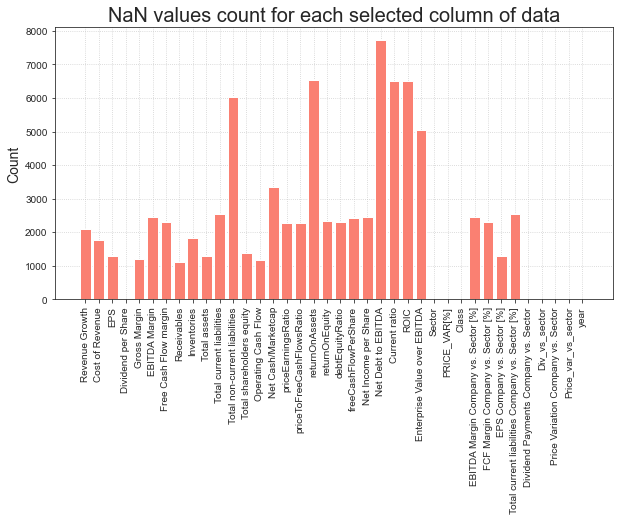

In [126]:
nan_vals = data.isna().sum()
ind = np.arange(data.shape[1])

plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
plt.title('NaN values count for each selected column of data', fontsize=20)
plt.bar(ind, nan_vals.values.tolist(), color = 'salmon')
plt.grid(ls = ':')
plt.ylabel('Count', fontsize = 14)
plt.xticks(ind, nan_vals.index.values, rotation='90');

This are great news, because there are not NaN values in the variables we will use as target, so we will not need to include that step in the futures pipelines for our models.

The most number of NaN values appear on: `Net Debt to EBITDA`, `Current Ratio`, `Return on Assets` and `ROIC`. 

This NAs values will be treated in the Pipelines included in next models notebooks.

## Train - Test sampling

As we have said before, train will be 2014 to 2017 data, and 2018 will be reserved for testing models and getting probabilities.

Columns listed in both train and test samples are:

In [5]:
data_train = pd.concat([data_2014_selected, data_2015_selected, data_2016_selected, data_2017_selected])
list(data_train.columns)

['Revenue Growth',
 'Cost of Revenue',
 'EPS',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'Free Cash Flow margin',
 'Receivables',
 'Inventories',
 'Total assets',
 'Total current liabilities',
 'Total non-current liabilities',
 'Total shareholders equity',
 'Operating Cash Flow',
 'Investing Cash flow',
 'Net Cash/Marketcap',
 'priceEarningsRatio',
 'priceToFreeCashFlowsRatio',
 'returnOnAssets',
 'returnOnEquity',
 'debtEquityRatio',
 'freeCashFlowPerShare',
 'Net Income per Share',
 'Net Debt to EBITDA',
 'Current ratio',
 'ROIC',
 'Enterprise Value over EBITDA',
 'Sector',
 'PRICE_VAR[%]',
 'Class',
 'EBITDA Margin Company vs. Sector [%]',
 'FCF Margin Company vs. Sector [%]',
 'EPS Company vs. Sector [%]',
 'Total current liabilities Company vs. Sector [%]',
 'Dividend Payments Company vs. Sector',
 'Div_vs_sector',
 'Price Variation Company vs. Sector',
 'Price_var_vs_sector',
 'year']

In [6]:
data_test = data_2018_selected
list(data_test.columns)

['Revenue Growth',
 'Cost of Revenue',
 'EPS',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'Free Cash Flow margin',
 'Receivables',
 'Inventories',
 'Total assets',
 'Total current liabilities',
 'Total non-current liabilities',
 'Total shareholders equity',
 'Operating Cash Flow',
 'Investing Cash flow',
 'Net Cash/Marketcap',
 'priceEarningsRatio',
 'priceToFreeCashFlowsRatio',
 'returnOnAssets',
 'returnOnEquity',
 'debtEquityRatio',
 'freeCashFlowPerShare',
 'Net Income per Share',
 'Net Debt to EBITDA',
 'Current ratio',
 'ROIC',
 'Enterprise Value over EBITDA',
 'Sector',
 'PRICE_VAR[%]',
 'Class',
 'EBITDA Margin Company vs. Sector [%]',
 'FCF Margin Company vs. Sector [%]',
 'EPS Company vs. Sector [%]',
 'Total current liabilities Company vs. Sector [%]',
 'Dividend Payments Company vs. Sector',
 'Div_vs_sector',
 'Price_var_vs_sector',
 'Price Variation Company vs. Sector',
 'year']

__There are some variables that have been really usefull for EDA's developement, but they get useless when constructing our models. Those are year and sector; they don't really provide further information for the target variables we are taking in consideration.__

In [7]:
data_train.drop(['year', 'Sector'], axis=1, inplace=True)
data_test.drop(['year', 'Sector'], axis=1, inplace=True)

In [8]:
info = {'Shape data_train': data_train.shape,
       'Shape data_test': data_test.shape}
info

{'Shape data_train': (17685, 37), 'Shape data_test': (4392, 37)}

We will save the datasets as excel due to not to cause data losses or missunterstoods.

In [9]:
data_train.to_excel('../data2/data_train.xlsx')
data_test.to_excel('../data2/data_test.xlsx')

## Bibliography:

+ https://seaborn.pydata.org/generated/seaborn.distplot.html


+ https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


+ https://investor.apple.com/investor-relations/default.aspx


+ https://www.investopedia.com/terms/p/price-earningsratio.asp#:~:text=The%20price%2Dto%2Dearnings%20ratio%20or%20P%2FE%20is,analysts%20for%20determining%20stock%20valuation.&text=This%20is%20why%20the%20P,pay%20per%20dollar%20of%20earnings.